# Using a Random Forest Classification to Predict Hepatitis Infection
#### This dataset comes from the UC Irvine Machine Learning Repositiory. It contains laboratory values for blood donors and Hepatitis C patients, as well as some demographic information. There are 615 instances, and 12 features.

#### The goal of this project is to develop a model to predict whether a sample comes from a patient with Hepatitis C.
#### We'll make the model random forest classification. Random forest classification is a machine learning technique that works well for logistic problems such as ours, where there are only two possible answers. In this case either we predict that the sample donor is either positive or negative for Hepatitis C. Importantly, random forest classification can be used for problems with more than two possible answers.

### Install ucimlrepo, if it isn't already installed. Then import libraries, we'll import sklearn later.

In [3]:
# Install ucimlrepo if not already installed
!pip3 install ucimlrepo

# Import libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# fetch dataset 
hcv_data = fetch_ucirepo(id=571) 
  
# data (as pandas dataframes) 
features = hcv_data.data.features 
targets = hcv_data.data.targets 
  
# metadata 
print(hcv_data.metadata) 
  
# variable information 
print(hcv_data.variables) 

{'uci_id': 571, 'name': 'HCV data', 'repository_url': 'https://archive.ics.uci.edu/dataset/571/hcv+data', 'data_url': 'https://archive.ics.uci.edu/static/public/571/data.csv', 'abstract': 'The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 615, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['Category'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5D612', 'creators': ['Ralf Lichtinghagen', 'Frank Klawonn', 'Georg Hoffmann'], 'intro_paper': {'ID': 237, 'type': 'NATIVE', 'title': 'Using machine learning techniques to generate laboratory diagnostic pathways—a case study', 'authors': 'Georg F. Hoffmann, A. Bietenb

In [5]:
# Look at info, describe and head to get an idea of the data
features.info()
features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    object 
 2   ALB     614 non-null    float64
 3   ALP     597 non-null    float64
 4   AST     615 non-null    float64
 5   BIL     615 non-null    float64
 6   CHE     615 non-null    float64
 7   CHOL    605 non-null    float64
 8   CREA    615 non-null    float64
 9   CGT     615 non-null    float64
 10  PROT    614 non-null    float64
 11  ALT     614 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 57.8+ KB


,Age,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
count,615.000000,614.000000,597.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,614.000000
mean,47.408130,41.620195,68.283920,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137,28.450814
std,10.055105,5.780629,26.028315,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636,25.469689
min,19.000000,14.900000,11.300000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.900000
25%,39.000000,38.800000,52.500000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,16.400000
50%,47.000000,41.950000,66.200000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,23.000000
75%,54.000000,45.200000,80.100000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,33.075000
max,77.000000,82.200000,416.600000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,325.300000


In [6]:
features.head()

,Age,Sex,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
0,32,m,38.5,52.5,22.1,7.5,6.93,3.23,106.0,12.1,69.0,7.7
1,32,m,38.5,70.3,24.7,3.9,11.17,4.80,74.0,15.6,76.5,18.0
2,32,m,46.9,74.7,52.6,6.1,8.84,5.20,86.0,33.2,79.3,36.2
3,32,m,43.2,52.0,22.6,18.9,7.33,4.74,80.0,33.8,75.7,30.6
4,32,m,39.2,74.1,24.8,9.6,9.15,4.32,76.0,29.9,68.7,32.6


In [7]:
# Do the same for y
targets.info()
targets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  615 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


,Category
count,615
unique,5
top,0=Blood Donor
freq,533


In [8]:
targets.head()

,Category
0,0=Blood Donor
1,0=Blood Donor
2,0=Blood Donor
3,0=Blood Donor
4,0=Blood Donor


In [9]:
# y is the disease status/ state and is what this model will try to predict. What are its unique values?
targets.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [10]:
# Combine into one data frame
all_data = pd.concat([targets, features], axis = 1)
all_data.head()

,Category,Age,Sex,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
0,0=Blood Donor,32,m,38.5,52.5,22.1,7.5,6.93,3.23,106.0,12.1,69.0,7.7
1,0=Blood Donor,32,m,38.5,70.3,24.7,3.9,11.17,4.80,74.0,15.6,76.5,18.0
2,0=Blood Donor,32,m,46.9,74.7,52.6,6.1,8.84,5.20,86.0,33.2,79.3,36.2
3,0=Blood Donor,32,m,43.2,52.0,22.6,18.9,7.33,4.74,80.0,33.8,75.7,30.6
4,0=Blood Donor,32,m,39.2,74.1,24.8,9.6,9.15,4.32,76.0,29.9,68.7,32.6


### How does our distribution look by age?

Text(0.5, 1.0, 'Distribution of Disease State by Age')

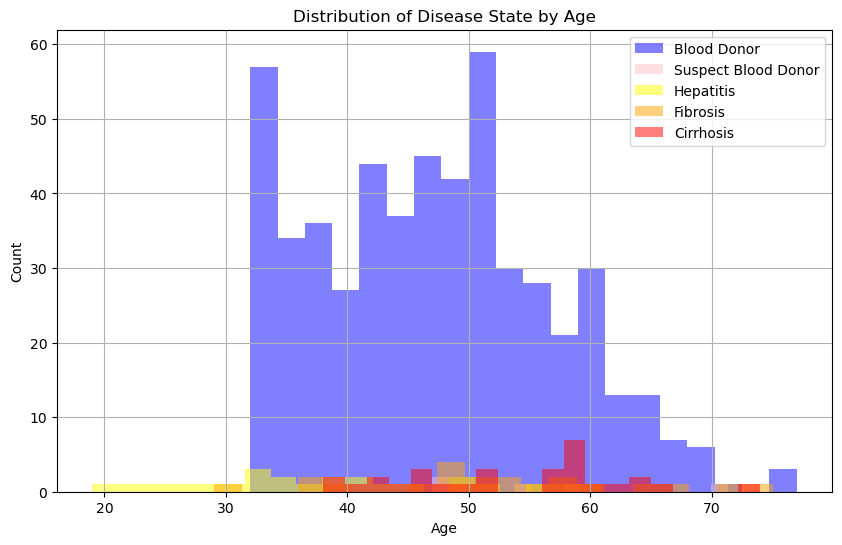

In [12]:
# Look at disease state by age
plt.figure(figsize = (10,6))
all_data[all_data['Category']== '0=Blood Donor']['Age'].hist(alpha = 0.5, color = 'blue', bins = 20, label = "Blood Donor" )
all_data[all_data['Category']== '0s=suspect Blood Donor']['Age'].hist(alpha = 0.5, color = 'pink', bins = 20, label = "Suspect Blood Donor" )
all_data[all_data['Category']== '1=Hepatitis']['Age'].hist(alpha = 0.5, color = 'yellow', bins = 20, label = "Hepatitis" )
all_data[all_data['Category']== '2=Fibrosis']['Age'].hist(alpha = 0.5, color = 'orange', bins = 20, label = "Fibrosis" )
all_data[all_data['Category']== '3=Cirrhosis']['Age'].hist(alpha = 0.5, color = 'red', bins = 20, label = "Cirrhosis" )

plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Disease State by Age')

### That looks a bit skewed, unfortunately none of the healthy blood donor samples are below age 32. This has nothing to do with disease state and more to do with the sampling method for this dataset. However we do have the following insights:
* No one under age 30 who is Hepatitis C positive has Fibrosis or Cirrhosis. This makes sense as the disease progresses with age. 

#### Let's try combining all Hepatitis positive groups into a single label. How does that distribution look?

Text(0.5, 1.0, 'Distribution of Infection Status by Age')

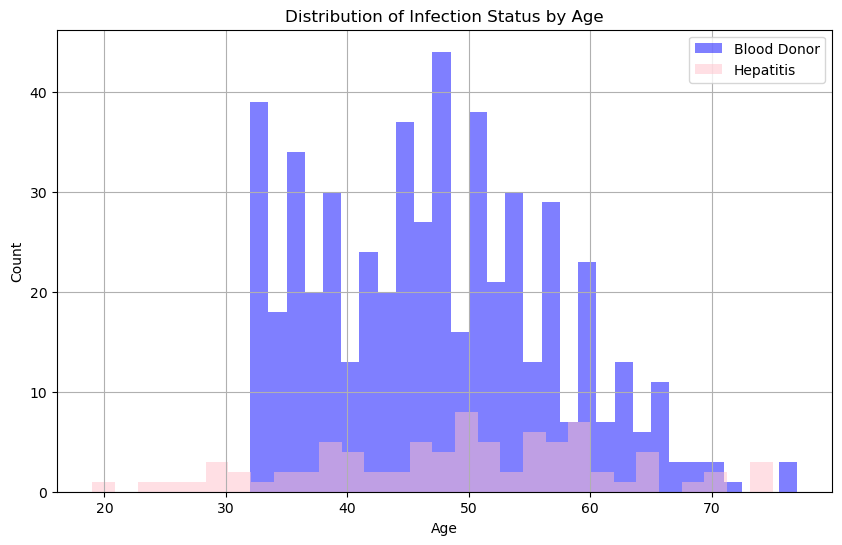

In [14]:
# Look at disease state by grouping 
plt.figure(figsize = (10,6))
all_data[all_data['Category']== '0=Blood Donor']['Age'].hist(alpha = 0.5, color = 'blue', bins = 30, label = "Blood Donor" )
all_data[all_data['Category']!= '0=Blood Donor']['Age'].hist(alpha = 0.5, color = 'pink', bins = 30, label = "Hepatitis" )
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Infection Status by Age')

### How many of instances of each category are present? And how is the distribution when we consider our demographic variable, sex?

Text(0.5, 1.0, 'Category Count by Disease State and Sex')

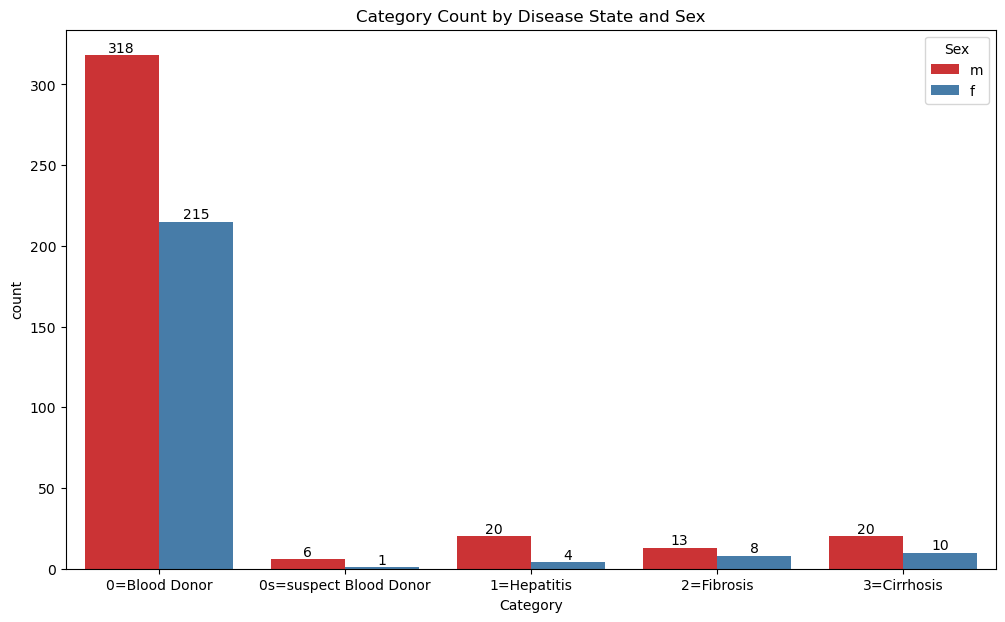

In [16]:
# How many of each sex were diagnosed?
plt.figure(figsize=(12,7))
ax = sns.countplot(data=all_data, x='Category', hue='Sex',palette='Set1')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title("Category Count by Disease State and Sex")

# Prepare data for analysis
* Drop Suspect Blood Donors as they aren't confirmed and there are so few of them. Including only 1 female sample.
* Make 'Sex' a categorical 

## Then combine all HCV positive samples under a single label, giving two categories Hepatitis C positive patient or Healthy Blood Donor
#### We do this for a few reasons shown in the exploratory analysis above:
* Some categories have very few instances. We want to limit imbalanced data as much as possible.
* Later on we'll be dividing the data into a training set and a test set, we want to make sure there will be enough instances for both.
* The goal of this model is to predict whether a sample comes from someone with Hepatitis C or is from a healthy blood donor. Predicting disease state is out of scope here.

In [18]:
# Drop suspected blood donors from the model
rows_to_drop = all_data[all_data['Category'] == '0s=suspect Blood Donor'].index
hep_data = all_data.drop(rows_to_drop)

hep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  608 non-null    object 
 1   Age       608 non-null    int64  
 2   Sex       608 non-null    object 
 3   ALB       607 non-null    float64
 4   ALP       590 non-null    float64
 5   AST       608 non-null    float64
 6   BIL       608 non-null    float64
 7   CHE       608 non-null    float64
 8   CHOL      598 non-null    float64
 9   CREA      608 non-null    float64
 10  CGT       608 non-null    float64
 11  PROT      607 non-null    float64
 12  ALT       607 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 66.5+ KB


In [19]:
# Sex should be categorial for sklearn to be able to understand it we can use pd.get_dummies to do this
final_data = pd.get_dummies(hep_data, columns = ['Sex'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  608 non-null    object 
 1   Age       608 non-null    int64  
 2   ALB       607 non-null    float64
 3   ALP       590 non-null    float64
 4   AST       608 non-null    float64
 5   BIL       608 non-null    float64
 6   CHE       608 non-null    float64
 7   CHOL      598 non-null    float64
 8   CREA      608 non-null    float64
 9   CGT       608 non-null    float64
 10  PROT      607 non-null    float64
 11  ALT       607 non-null    float64
 12  Sex_f     608 non-null    bool   
 13  Sex_m     608 non-null    bool   
dtypes: bool(2), float64(10), int64(1), object(1)
memory usage: 62.9+ KB


## Combine all Hepatitis conditions to predict infection status not disease state
* Then look at new attributes

In [21]:
hep_dict = dict.fromkeys(['1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'], 'Hepatitis')

final_data = hep_data.replace(hep_dict)
final_data = final_data.replace('0=Blood Donor', 'Blood Donor')

Text(0.5, 1.0, 'Category Count by Sex')

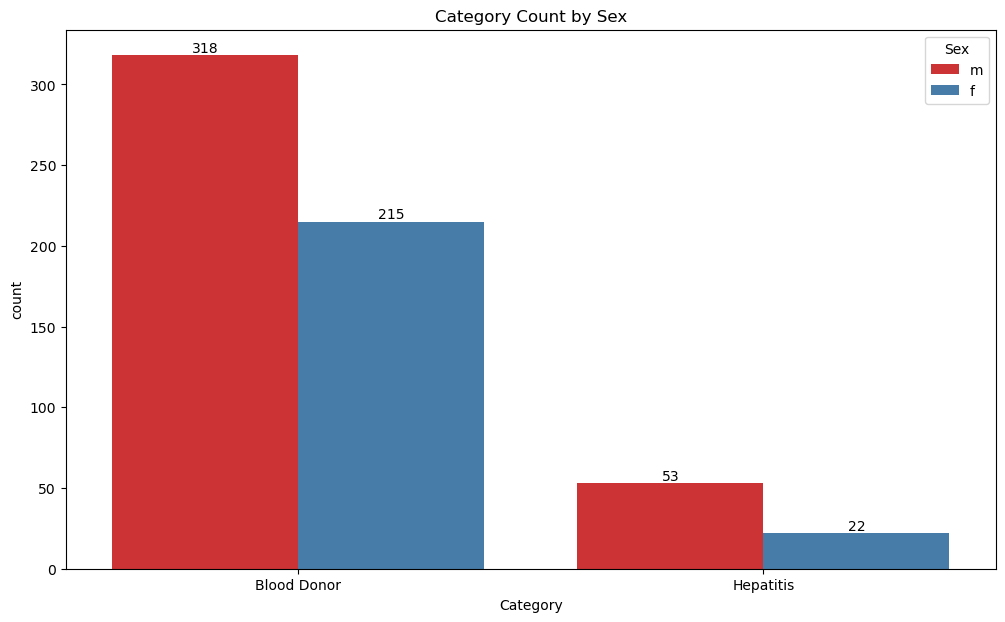

In [22]:
# How many of each sex were diagnosed?
plt.figure(figsize=(12,7))
ax = sns.countplot(data=final_data, x='Category', hue='Sex',palette='Set1')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title("Category Count by Sex")

In [23]:
# Sex should be categorial for sklearn to be able to understand it we can use pd.get_dummies to do this
final_data = pd.get_dummies(final_data, columns = ['Sex'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  608 non-null    object 
 1   Age       608 non-null    int64  
 2   ALB       607 non-null    float64
 3   ALP       590 non-null    float64
 4   AST       608 non-null    float64
 5   BIL       608 non-null    float64
 6   CHE       608 non-null    float64
 7   CHOL      598 non-null    float64
 8   CREA      608 non-null    float64
 9   CGT       608 non-null    float64
 10  PROT      607 non-null    float64
 11  ALT       607 non-null    float64
 12  Sex_f     608 non-null    bool   
 13  Sex_m     608 non-null    bool   
dtypes: bool(2), float64(10), int64(1), object(1)
memory usage: 62.9+ KB


# Split data into training and test sets

In [25]:
# Split data into a training set and a testing set
from sklearn.model_selection import train_test_split

In [26]:
# Split data category off from features
X = final_data.drop('Category',axis = 1)
y = final_data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 105)

# Start with a Decision Tree

In [28]:
# Time to train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## What does our decision tree look like?

Text(0.5, 1.0, 'Decision Tree')

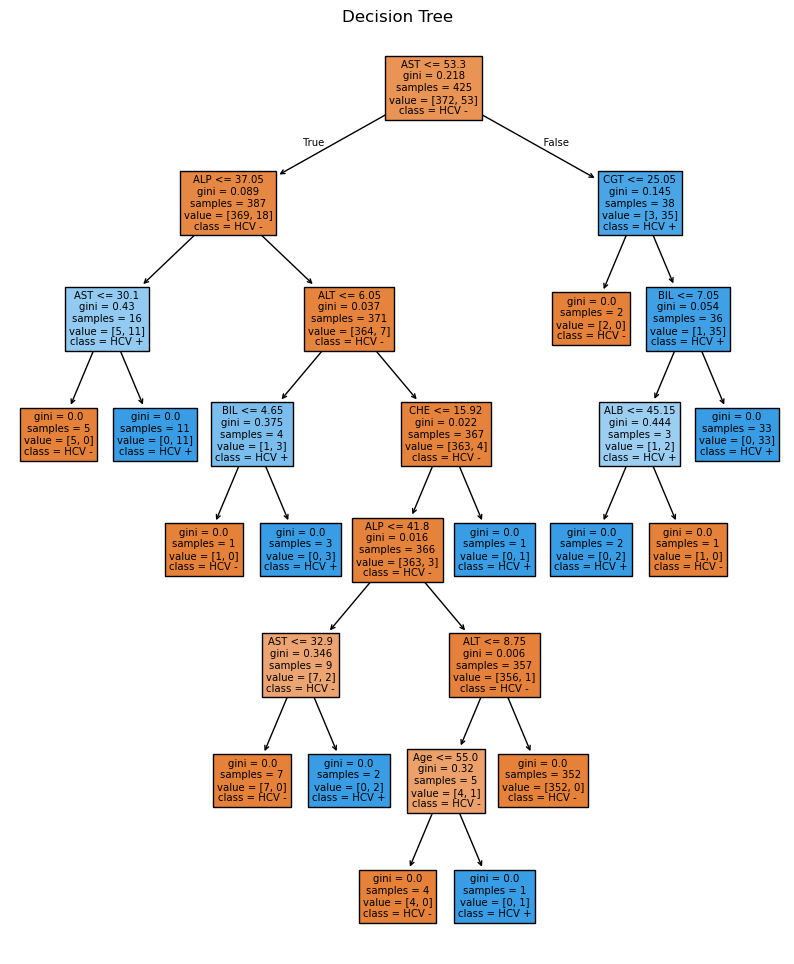

In [32]:
plt.figure(figsize = (10,12))
plot_tree(dtree, feature_names = X.columns , class_names = ['HCV -', 'HCV +'], filled = True)
plt.title("Decision Tree")

In [33]:
predictions = dtree.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 Blood Donor       0.99      0.98      0.98       161
   Hepatitis       0.87      0.91      0.89        22

    accuracy                           0.97       183
   macro avg       0.93      0.95      0.94       183
weighted avg       0.97      0.97      0.97       183



In [36]:
print(f"RF train accuracy: {dtree.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {dtree.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.973


In [37]:
print(confusion_matrix(y_test, predictions))

[[158   3]
 [  2  20]]


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

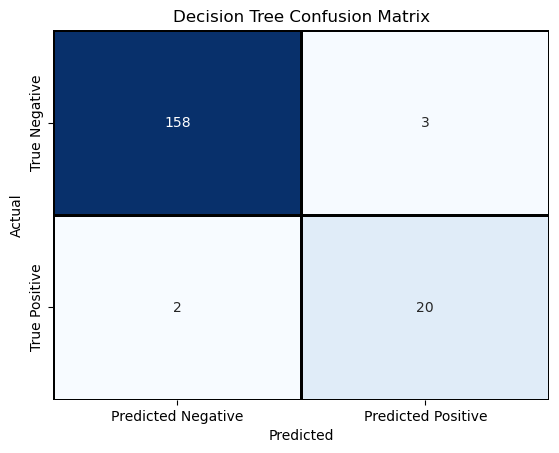

In [38]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap = "Blues", linecolor='black', linewidth=.75,
           cbar = False,
               xticklabels=['Predicted Negative', 'Predicted Positive'],
               yticklabels = ['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')

# Now use a Random Forest Model, which utilizes multiple decision trees

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
predictions = rfc.predict(X_test)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 Blood Donor       0.99      1.00      0.99       161
   Hepatitis       1.00      0.91      0.95        22

    accuracy                           0.99       183
   macro avg       0.99      0.95      0.97       183
weighted avg       0.99      0.99      0.99       183



In [45]:
print(f"RF train accuracy: {rfc.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rfc.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.989


In [46]:
print(confusion_matrix(y_test, predictions))

[[161   0]
 [  2  20]]


Text(0.5, 1.0, 'Random Forest Classification Confusion Matrix')

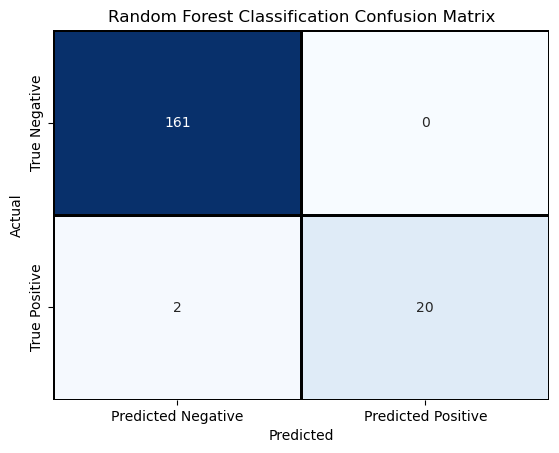

In [47]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap = "Blues", linecolor='black', linewidth=.75,
           cbar = False,
               xticklabels=['Predicted Negative', 'Predicted Positive'],
               yticklabels = ['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classification Confusion Matrix')

# What features are most important for the model?

## Look at Permutation Importance
### Permutation Feature Importance is a measure of the contribution of each feature to the model's statistical performance on a given dataset. It involved randomly shuffling the values of a single feature and observing how that impacts the model's f1 score.

In [50]:
from sklearn.inspection import permutation_importance

In [51]:
feature_names = X.columns

results = permutation_importance(rfc, X_test, y_test, n_repeats = 10, n_jobs =2)
results
forest_importances = pd.Series(results.importances_mean, index = feature_names).sort_values(ascending = True)

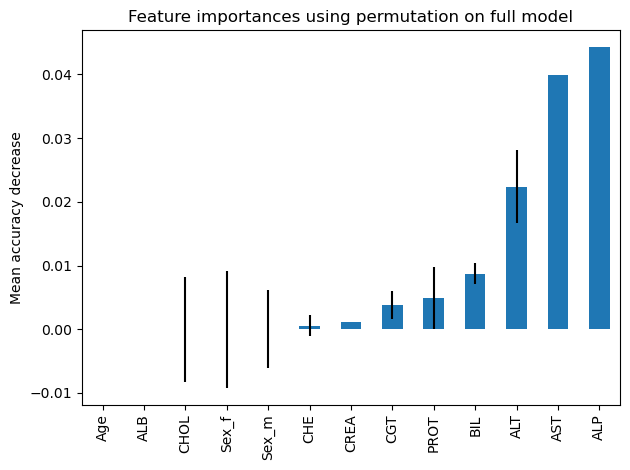

In [52]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=results.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### ALP and AST are the most important features according to analysis based on permutations
* AST stands for aspartate aminotransferase. It's an enzyme that speeds up chemical reactions in the body, it's found primarily in organs and tissues with relatively little found in blood. However, AST is released into the bloodstream following liver damage, or damage to AST producing cells. It makes sense that AST would be importnant here.
* ALP stands for alkaline phosphatase, another enzyme found in the liver (as well as some other tissues and bone). It's believed to be involved in multiple processes. While it doesn't directly indicate liver damage or inflammation elevated levels signal a problem with bile flow or pressure within the liver.

# What each features GINI index?
* This is used to evaluate the quality of a split in a decision tree or purity. Since each node represents a split around a single feature we prefer nodes (and thus features) where samples are split and correctly classified. A lower index means a purer split, meaning data points in resulting nodes are more likely to belong to the same class.


In [55]:
mdi_importances = pd.Series(rfc.feature_importances_, index = feature_names).sort_values(ascending = True)
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)


## Note: The graph below shows the Mean decrease in impurity. So higher values are associated with lower GINI indexes.

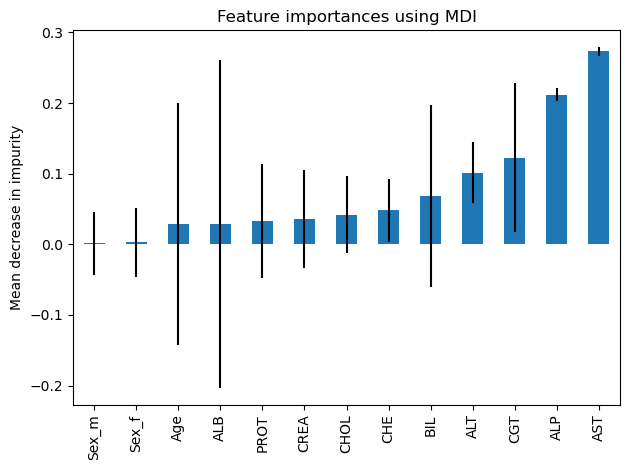

In [57]:

fig, ax = plt.subplots()
mdi_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Once again ALP and AST are the most important features, although their positions have switched.

# Does our model also think the suspect Blood donor samples may be from HCV positive persons?
### Remember to make Sex a categorical variable

In [60]:
suspected_samples = all_data[all_data['Category'] == '0s=suspect Blood Donor']
# Now drop the Category Column
suspected_samples = suspected_samples.drop( axis = 'columns', columns = 'Category')

suspected_samples = pd.get_dummies(suspected_samples, columns = ['Sex'])
suspected_samples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 533 to 539
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     7 non-null      int64  
 1   ALB     7 non-null      float64
 2   ALP     7 non-null      float64
 3   AST     7 non-null      float64
 4   BIL     7 non-null      float64
 5   CHE     7 non-null      float64
 6   CHOL    7 non-null      float64
 7   CREA    7 non-null      float64
 8   CGT     7 non-null      float64
 9   PROT    7 non-null      float64
 10  ALT     7 non-null      float64
 11  Sex_f   7 non-null      bool   
 12  Sex_m   7 non-null      bool   
dtypes: bool(2), float64(10), int64(1)
memory usage: 686.0 bytes


In [61]:
suspect_predictions = rfc.predict(suspected_samples)
print(suspect_predictions)

['Blood Donor' 'Blood Donor' 'Blood Donor' 'Blood Donor' 'Blood Donor'
 'Blood Donor' 'Hepatitis']
